<a href="https://colab.research.google.com/github/IntheLoops/IntheLoops/blob/main/Multiverse_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Pandas?

* **Pandas** is a popular Python package for data analysis, data cleaning, and data manipulation. It is used in a variety of data engineering, data analytics, and data science roles.
* Pandas provides the core component of the Dataframe, a way of storing tabular structured data in a table.
* Pandas is conventionally imported with the alias 'pd'.
* Pandas is almost always used with two other Python packages which provide useful utilities:
* * **NumPy**, which proviudes various numerical and mathematical abilities, imported as 'np'.
* * **Matplotlib.pyplot**, which is a graphing package, imported as 'plt'.

In [ ]:
!pip install meteostat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Our Datasets

* Today we are going to work with three different datasets;
* * the all-time classic Titanic dataset containing data about passengers on the Titanic
* * the famous Iris dataset,
* * weather data recorded in London, which we will retrieve using the open-source meteostat package.

* You will need to install the meteostat package once before running this noteboook - uncomment the below cell and run it once.
* Meteostat documentation: https://github.com/meteostat/meteostat-python

In [ ]:
# !pip install meteostat

In [ ]:
# You can read in a csv file directly from the internet

titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

iris_data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [ ]:
from meteostat import Point, Daily

# Set time period
start = datetime(1990, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for London, UK
location = Point(51.5072, 0.1276, 50)

# Get daily data for 2018
london_data = Daily(location, start, end)
london_data = london_data.fetch()

## Dataframes: a Brief Introduction

* The dataframe is the fundamental component of Pandas that we will be working with. It's essentially a table.
* Dataframe elements:
* * **Index:** This serves as the "row labels" or identifiers for each row of data. By default, the index is a sequence of integers starting from 0, but you can customize it to be any set of values or labels.
* * **Columns:** Columns are the named components of a DataFrame, and they represent the variables or attributes of the data. Each column has a unique label, and you can access and manipulate the data within each column.
* * **Rows:** Rows are the individual records or observations in the DataFrame. Each row corresponds to a single data point and contains values for each column.
* * **Shape:** The shape of a DataFrame is represented as a tuple (n, m), where 'n' is the number of rows, and 'm' is the number of columns. You can access the shape of a DataFrame using the shape attribute.

### Some Necessary Jargon: Attributes, Methods, Functions

**Attributes:**  Attributes are like characteristics or properties of a dataframe. They provide information about the dataframe without changing it. For example, the "shape" attribute tells you the number of rows and columns in the dataframe, and the "columns" attribute lists the column names.

**Methods:** Methods are actions or operations you can perform on a dataframe. They allow you to modify, analyze, or extract data from the dataframe. For example, the "head()" method displays the first few rows of the dataframe, and the "describe()" method provides summary statistics. They may take *parameters* inside the brackets which give the method extra information or instructions.

**Functions:** Functions are pieces of reusable code that perform specific tasks. In pandas, functions are often used to manipulate dataframes. You can use built-in functions or create custom functions to process and transform data within the dataframe. For example, the "mean()" function calculates the mean of a column, and you can create a custom function to clean and format your data. Functions may also take *parameters* inside the brackets which give the function extra information or instructions.

### Inspecting Your Data  

#### The .head() and .tail() methods
* .head(n) allows you to see 'n' rows at the top of your data.
* .tail(n) does the same, but at the bottom of your data.
* both default to five rows.

In [ ]:
london_data.head(10)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1992-04-03,5.7,3.9,8.1,NaN,NaN,NaN,NaN,NaN,1006.1,NaN
1992-04-04,6.0,2.7,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-05,7.6,3.0,11.5,NaN,NaN,NaN,NaN,NaN,1014.6,NaN
1992-04-06,7.0,5.6,7.9,NaN,NaN,NaN,NaN,NaN,1004.0,NaN
1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-09,11.0,6.3,15.9,NaN,NaN,59.0,12.6,NaN,1024.9,NaN
1992-04-10,11.9,7.0,16.3,NaN,NaN,NaN,5.8,NaN,1024.0,NaN
1992-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### The 'Shape' method:
* The shape of a DataFrame is represented as a tuple (n, m), where 'n' is the number of rows, and 'm' is the number of columns. You can access the shape of a DataFrame using the shape attribute.

In [ ]:
titanic.shape

(891, 12)

In [ ]:
london_data.shape

(11544, 10)

In [ ]:
iris_data.shape

(150, 5)

#### Data Types

* In Pandas DataFrames, data types (dtypes) refer to the specific types of data contained within each column.
* Data types are important because they determine how the data is stored in memory, how it can be processed, and the kind of operations that can be performed on it.
* The `dtypes` attribute allows you to retrieve the data types of each column in a DataFrame.

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
iris_data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [ ]:
london_data.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

### Indexes, and Why They're Important

* Indexes in pandas dataframes are like the 'backbone' of your data, providing a structured way to access, manipulate, and organize your information.
* They serve as labels for rows, allowing you to quickly locate and select specific data points.

#### Setting and Resetting an Index

* This method allows you to set a specific column as the dataframe's index. * For example, df.set_index('Date') sets the 'Date' column as the index.
* If you want to reset the index to a numerical one, and restore the original column, use .reset_index()

In [ ]:
titanic = titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic = titanic.reset_index()
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Sorting by an Index

* This allows us to sort ascending and descending.

In [ ]:
london_data.sort_index()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1992-04-03,5.7,3.9,8.1,NaN,NaN,NaN,NaN,NaN,1006.1,NaN
1992-04-04,6.0,2.7,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-05,7.6,3.0,11.5,NaN,NaN,NaN,NaN,NaN,1014.6,NaN
1992-04-06,7.0,5.6,7.9,NaN,NaN,NaN,NaN,NaN,1004.0,NaN
1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-11-06,7.2,5.5,9.9,NaN,NaN,246.0,17.0,38.9,997.7,NaN
2023-11-07,7.6,5.9,10.1,NaN,NaN,235.0,21.7,44.5,1005.0,NaN
2023-11-08,6.9,4.7,10.2,NaN,NaN,247.0,19.2,37.0,1008.5,NaN


In [ ]:
london_data.sort_index(ascending = False)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-11-10,7.5,6.1,9.4,NaN,NaN,228.0,20.2,33.3,1011.4,NaN
2023-11-09,6.6,4.8,9.3,NaN,NaN,243.0,17.8,33.3,1011.4,NaN
2023-11-08,6.9,4.7,10.2,NaN,NaN,247.0,19.2,37.0,1008.5,NaN
2023-11-07,7.6,5.9,10.1,NaN,NaN,235.0,21.7,44.5,1005.0,NaN
2023-11-06,7.2,5.5,9.9,NaN,NaN,246.0,17.0,38.9,997.7,NaN
...,...,...,...,...,...,...,...,...,...,...
1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-06,7.0,5.6,7.9,NaN,NaN,NaN,NaN,NaN,1004.0,NaN
1992-04-05,7.6,3.0,11.5,NaN,NaN,NaN,NaN,NaN,1014.6,NaN


## Selecting Data from your Dataframe

* Sometimes, you don't want to see the whole dataframe - there are many options for seeing just one column, or a subset of columns.
* Using Boolean Masks
* Using the .drop() method to delete columns
* There are also ways to filter the rows that you see in a dataframe.
* You can use these methods and the assignment operator `=` to 'save' these filtered dataframes as new dataframe objects.

#### The Dot Operator
* Allows you to see just one column as a Pandas Series
* ! Note - this only works if there are no spaces in your column name!

In [ ]:
london_data.tmin

SyntaxError: ignored

#### Accessing one Column: [ ]
* This only requires one square bracket and returns a Pandas Series.

In [ ]:
london_data['tmin']

time
1992-04-03     3.9
1992-04-04     2.7
1992-04-05     3.0
1992-04-06     5.6
1992-04-07     NaN
              ... 
2023-10-22     6.0
2023-10-23     8.4
2023-10-24     8.6
2023-10-25     9.1
2023-10-26    10.0
Freq: D, Name: tmin, Length: 11529, dtype: float64

#### Accessing More than One Column: [[ ]]
* This requires two brackets as it is technically inputting a list, which is defined as being a comma separated list of values between square brackets `[ ]`
* This returns a dataframe.

In [ ]:
london_data[['tmin', 'tmax']]

,tmin,tmax
time,,
1992-04-03,3.9,8.1
1992-04-04,2.7,9.1
1992-04-05,3.0,11.5
1992-04-06,5.6,7.9
1992-04-07,NaN,NaN
...,...,...
2023-11-06,5.5,9.9
2023-11-07,5.9,10.1
2023-11-08,4.7,10.2


#### Renaming as a new object

* We can rename our subset of columns as a new dataframe object.
* We can then operate on it as any other dataframe object.
* If we rename it as the same thing as the original dataframe, it will 'overwrite' the original.

In [ ]:
min_and_max = london_data[['tmin', 'tmax']]

In [ ]:
min_and_max.head()

,tmin,tmax
time,,
1992-04-03,3.9,8.1
1992-04-04,2.7,9.1
1992-04-05,3.0,11.5
1992-04-06,5.6,7.9
1992-04-07,NaN,NaN


#### Dropping columns
* This requires two bits of information - the column or columns that you want to drop, and the 'axis'.
* The axis basically says 'is this a row or a column that you want to drop'?
* axis = 0 is a row, axis = 1 is a column.

In [ ]:
london_data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1992-04-04,6.0,2.7,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-05,7.6,3.0,11.5,NaN,NaN,NaN,NaN,NaN,1014.6,NaN
1992-04-06,7.0,5.6,7.9,NaN,NaN,NaN,NaN,NaN,1004.0,NaN
1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
london_data = london_data.drop(["1992-04-03"], axis = 0)

In [ ]:
london_data = london_data.drop(["wdir", "wspd", "wpgt"], axis = 1, in_place= True)

#### Creating New Columns

* We can derive new columns from existing ones using operations such as the below.
* Most common operations are numerical ones, string functions, or if/else statements.

In [ ]:
# Creating a date column
london_data["tdiff"] = london_data["tmax"] - london_data["tmin"]

london_data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,tdiff
time,,,,,,,,,,,
1992-04-04,6.0,2.7,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4
1992-04-05,7.6,3.0,11.5,NaN,NaN,NaN,NaN,NaN,1014.6,NaN,8.5
1992-04-06,7.0,5.6,7.9,NaN,NaN,NaN,NaN,NaN,1004.0,NaN,2.3
1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
* Data Cleaning refers to the process of preparing your data for analysis and data science activities.
* It's very important as data quality is directly proportional to quality of analytics and models produced using the data.
* Most common cleaning tasks inlcude replacing placeholder or null values (commonly seen as NaN in Python), removing outliers, changing data types into more workable ones, and engineering new features (columns).

### The isna() method

* This allows us to see where there are any NaN, or 'not a number' values - this can be an issue for plotting and Machine Learning algorithms, so they need to removed and/or replaced.
* Commonly they are replaced by a default value, or the mean of the dataset column if that column is numerical.

In [ ]:
titanic.isna().sum()

index            0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
iris_data.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
london_data.isna().sum()

tavg      2650
tmin      2650
tmax      2650
prcp     10509
snow     11543
pres      5090
tsun     11543
tdiff     2650
dtype: int64

### The Replace Method

In [ ]:
titanic["Embarked"] = titanic["Embarked"].replace({"S":0, "C":1, "Q":2, np.nan: 0})

In [ ]:
titanic["Age"] = titanic["Age"].replace({np.nan: titanic["Age"].mean()})

### The 'Get Dummies' method:
* The get_dummies function will create two new columns, one for "female" and one for "male," with binary values (1 or 0) indicating the presence of each category.
* You could use a binary encoding for this, as it only represents two categories; three or more would need to use dummy variables.
* This form of data preparation can introduce issues for machine learning, so use it wisely, and only when there are less than 5 categories (usually).

In [ ]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
titanic = pd.get_dummies(titanic, columns=["Sex"], drop_first=True)

### The 'to_datetime()' method:

* This allows us to change a column into a DateTime data type - very important for e.g. forecasting by date.

In [ ]:
london_data = london_data.reset_index()
london_data.head()

,time,tavg,tmin,tmax,prcp,snow,pres,tsun,tdiff
0,1992-04-04,6.0,2.7,9.1,NaN,NaN,NaN,NaN,6.4
1,1992-04-05,7.6,3.0,11.5,NaN,NaN,1014.6,NaN,8.5
2,1992-04-06,7.0,5.6,7.9,NaN,NaN,1004.0,NaN,2.3
3,1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
london_data["time"] = pd.to_datetime(london_data["time"])

london_data = london_data.set_index("time")

london_data.head()

,tavg,tmin,tmax,prcp,snow,pres,tsun,tdiff
time,,,,,,,,
1992-04-04,6.0,2.7,9.1,NaN,NaN,NaN,NaN,6.4
1992-04-05,7.6,3.0,11.5,NaN,NaN,1014.6,NaN,8.5
1992-04-06,7.0,5.6,7.9,NaN,NaN,1004.0,NaN,2.3
1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Renaming Columns

In [ ]:
# use comments!

london_data.rename(columns={'tavg': 'average_temp', 'tmin': 'minimum_temp', 'tmax':'maximum_temp', 'tdiff':'difference_in_temp'}, inplace=True)
london_data.head()

,average_temp,minimum_temp,maximum_temp,prcp,snow,pres,tsun,difference_in_temp
time,,,,,,,,
1992-04-04,6.0,2.7,9.1,NaN,NaN,NaN,NaN,6.4
1992-04-05,7.6,3.0,11.5,NaN,NaN,1014.6,NaN,8.5
1992-04-06,7.0,5.6,7.9,NaN,NaN,1004.0,NaN,2.3
1992-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
iris_data.rename(columns = {'sepal.length':'sepal_length', 'sepal.width':'sepal_width', 'petal.length':'petal_length', 'petal.width':'petal_width'}, inplace = True)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Basic Analysis Functions
* Min and Max values
* Mean and Standard Deviation
* the describe() method for basic statistics
* Value_counts and grouping
* .query() method.

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Basic Analysis for Iris dataset:
print("Basic Analysis for Iris dataset:")
# Min and Max values
min_values = iris_data.min()
max_values = iris_data.max()

print(f"Min values:\n{min_values}\n")
print(f"Max values:\n{max_values}\n")

# Mean and Standard Deviation
mean_values = iris_data.mean()
std_deviation = iris_data.std()

print(f"Mean values:\n{mean_values}\n")
print(f"Standard Deviation:\n{std_deviation}\n")


Basic Analysis for Iris dataset:
Min values:
sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
variety         Setosa
dtype: object

Max values:
sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
variety         Virginica
dtype: object

Mean values:
sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Standard Deviation:
sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64



In [ ]:
iris_data['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [ ]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
london_data['minimum_temp'].describe()

count    8879.00000
mean        9.16164
std         4.98512
min        -6.30000
25%         5.70000
50%         9.50000
75%        13.00000
max        22.70000
Name: minimum_temp, dtype: float64

In [ ]:
# simple group by

titanic.groupby('Sex_male')['Survived'].count()

Sex_male
0    314
1    577
Name: Survived, dtype: int64

In [ ]:
# group by multiple columns

titanic.groupby(['Sex_male', 'Survived'])['Survived'].count()

Sex_male  Survived
0         0            81
          1           233
1         0           468
          1           109
Name: Survived, dtype: int64

In [ ]:
# using .mean() with groupby()

iris_data.groupby('variety')['sepal_length'].mean()

variety
Setosa        5.006
Versicolor    5.936
Virginica     6.588
Name: sepal_length, dtype: float64

In [ ]:
# using .describe() with groupby()

iris_data.groupby('variety')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
variety,,,,,,,,
Setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


### 'resample' for time series data
* Time Series Resampling: resample() is used for time series data to change the frequency of the data. It is typically used with DataFrames that have a datetime index. It resamples data based on this index.
* It allows you to specify the target frequency using various string codes like 'D' for days, 'M' for months, 'Y' for years, etc. This means you can upsample and dowsample (increase and decreae the frequency of your data).
* Use with Aggregation: After resampling, you can apply aggregation functions like .sum(), .mean(), .max(), .min(), etc., to compute statistics within the new frequency intervals.

In [ ]:
london_data.resample('Y')['average_temp', 'minimum_temp', 'maximum_temp'].mean()

,average_temp,minimum_temp,maximum_temp
time,,,
1992-12-31,13.320112,10.548603,16.254749
1993-12-31,11.563084,8.818224,14.454206
1994-12-31,11.648182,8.945000,14.456818
1995-12-31,12.444920,9.495187,15.622995
1996-12-31,10.314644,7.731381,13.061088
1997-12-31,11.368276,8.469655,14.640000
1998-12-31,12.854023,9.988506,16.020115
1999-12-31,13.093182,10.225455,16.448636
2000-12-31,11.909717,9.257085,14.843725


In [ ]:
london_data.resample('M')['average_temp', 'minimum_temp', 'maximum_temp'].mean()

,average_temp,minimum_temp,maximum_temp
time,,,
1992-04-30,9.747059,6.735294,12.917647
1992-05-31,16.852941,12.758824,20.905882
1992-06-30,17.060000,13.485000,20.605000
1992-07-31,18.169565,15.156522,21.347826
1992-08-31,16.995652,14.560870,19.873913
...,...,...,...
2023-07-31,18.274194,15.022581,21.732258
2023-08-31,18.258065,14.829032,22.183871
2023-09-30,18.866667,15.100000,23.266667


### The .query() method

* .query() allows you to filter a DataFrame using a Boolean expression (i.e. one that evaluates to true or false).
* The filter condition is specified as a string expression. This makes it very easy to read.
* You can use multiple conditions within the same query, for example: df.query('value > 10 and category == "A"').

In [ ]:
# .query() method
query_result = iris_data.query('sepal_length > 5')  # One condition
print(f"Query Result:\n{query_result}\n")

Query Result:
     sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
5             5.4          3.9           1.7          0.4     Setosa
10            5.4          3.7           1.5          0.2     Setosa
14            5.8          4.0           1.2          0.2     Setosa
15            5.7          4.4           1.5          0.4     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[118 rows x 5 columns]



In [ ]:
# .query() method
query_result = iris_data.query('(sepal_length > 5) & (variety == "Setosa")')  # Combine multiple conditions using logical operators & | etc
print(f"Query Result:\n{query_result}\n")

Query Result:
    sepal_length  sepal_width  petal_length  petal_width variety
0            5.1          3.5           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
10           5.4          3.7           1.5          0.2  Setosa
14           5.8          4.0           1.2          0.2  Setosa
15           5.7          4.4           1.5          0.4  Setosa
16           5.4          3.9           1.3          0.4  Setosa
17           5.1          3.5           1.4          0.3  Setosa
18           5.7          3.8           1.7          0.3  Setosa
19           5.1          3.8           1.5          0.3  Setosa
20           5.4          3.4           1.7          0.2  Setosa
21           5.1          3.7           1.5          0.4  Setosa
23           5.1          3.3           1.7          0.5  Setosa
27           5.2          3.5           1.5          0.2  Setosa
28           5.2          3.4           1.4          0.2  Setosa
31         

# Matplotlib for Plotting Graphs

* Matplotlib is a popular Python library that helps you create a wide range of static, animated, or interactive visualizations and plots.
* With Matplotlib, you can create simple line plots, bar charts, scatter plots, histograms, and more.
* It's a valuable tool for anyone looking to better understand and communicate data- by writing a few lines of code, you can turn your data into meaningful and informative visual representations.

### Anatomy of a MatPlotLib chart:

* plt.figure() - this initialises the chart and allows you to choose the size.
* plt.chart_type() - this selects the type of chart you will use.
* plt.title() - this allows you to give a title.
* plt.xlabel and plt.ylabel allow you to specify X and Y axis labels
* plt.show() necessary to see your graph.
* plt.legend() - turns the legend on for multiple series data
* plt.grid(True) - whether there is a grid behind the data or not
* plt.tight_layout() - automatically a graph or subplots to ensure elements do not overlap with one another

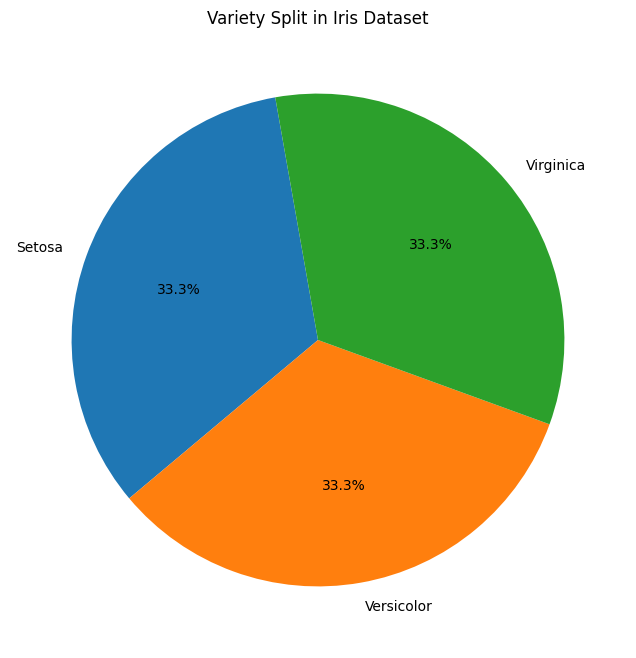

In [ ]:
variety_counts = iris_data['variety'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(variety_counts, labels=variety_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Variety Split in Iris Dataset')
plt.show()

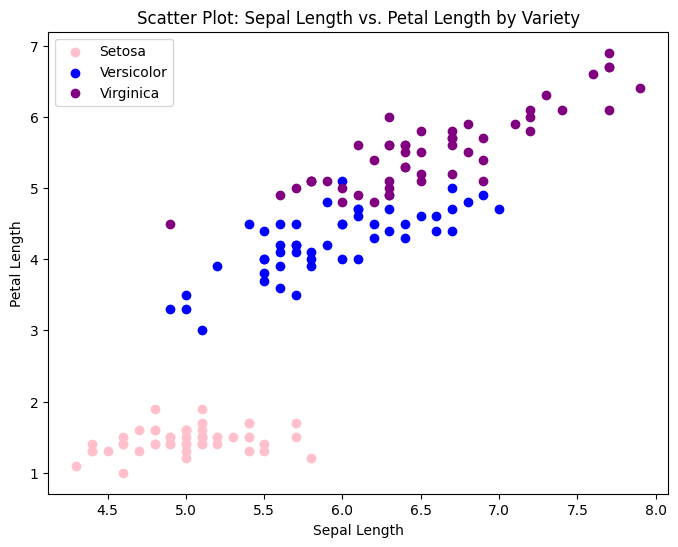

In [ ]:
plt.figure(figsize=(8, 6))

# Define colors for each variety
colors = {'Setosa': 'pink', 'Versicolor': 'blue', 'Virginica': 'purple'}

# Loop through each variety and plot the data points with the corresponding color
for variety, color in colors.items():
    subset = iris_data[iris_data['variety'] == variety]
    plt.scatter(subset['sepal_length'], subset['petal_length'], c=color, label=variety)

plt.title('Scatter Plot: Sepal Length vs. Petal Length by Variety')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

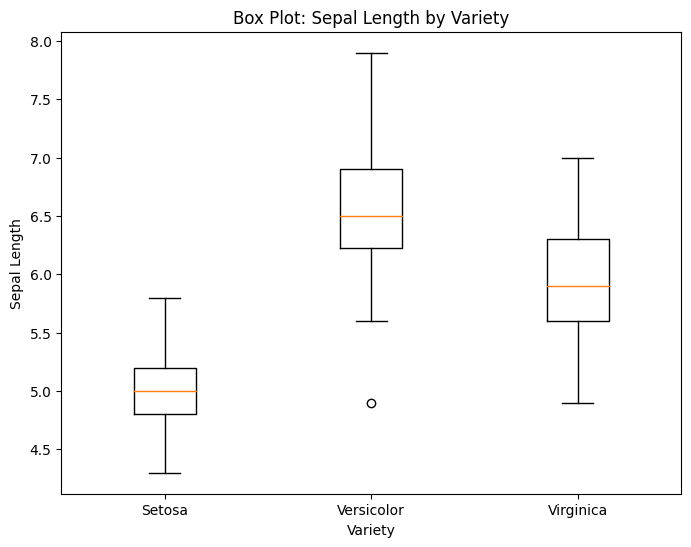

In [ ]:
plt.figure(figsize=(8, 6))

box_data = [iris_data[iris_data['variety'] == variety]['sepal_length'] for variety in ['Setosa', 'Virginica', 'Versicolor']]

plt.boxplot(box_data, labels=iris_data['variety'].unique())
plt.title('Box Plot: Sepal Length by Variety')
plt.xlabel('Variety')
plt.ylabel('Sepal Length')
plt.show()

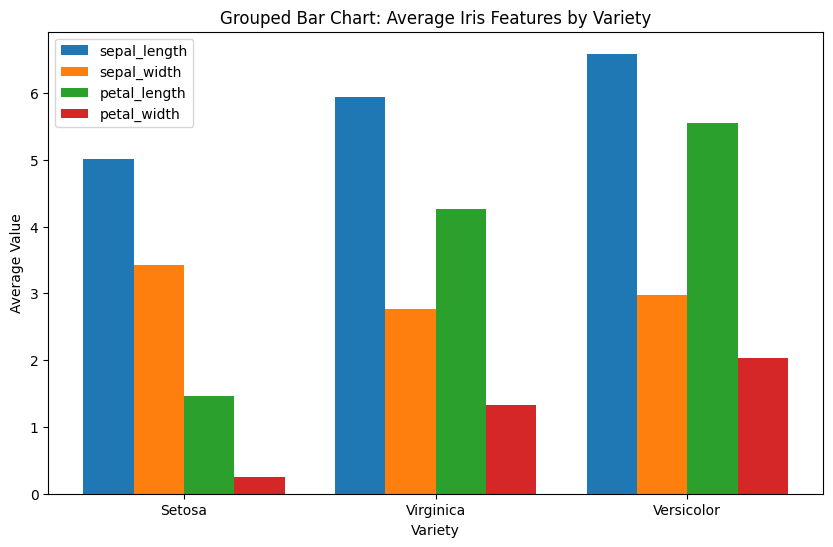

In [ ]:
grouped_data = iris_data.groupby('variety').mean()

# Extract the varieties and features
varieties = ['Setosa', 'Virginica', 'Versicolor']
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Define the bar width
bar_width = 0.2

# Calculate the x-axis positions for the bars - 3 as we hav 3 varieties
x = range(3)

# Create a figure
plt.figure(figsize=(10, 6))

# Loop through each feature and create a grouped bar for each variety
# enumerate generates a number starting from 0, plus loops through a list, for each item in a list
# - in this case, our features list

for i, feature in enumerate(features):
    plt.bar(
        [pos + (i * bar_width) for pos in x], # gives the bar position
        grouped_data[feature], #column of our grouped dataframe
        width=bar_width,
        label=feature)

# Set x-axis labels - the first part simply centres the label in the middle of the bars

plt.xticks([pos + (len(features) - 1) * bar_width / 2 for pos in x], varieties)

plt.title('Grouped Bar Chart: Average Iris Features by Variety')
plt.xlabel('Variety')
plt.ylabel('Average Value')
plt.legend()
plt.show()

### Plt.plot() - for line graphs

* plt.plot() is a fundamental function in Matplotlib for creating line plots. It is used to visualize data by plotting points and connecting them with lines.
* Its structure is: `plt.plot(x, y, linestyle, marker, color, label)`
* * x: The x-values or data points for the horizontal axis.
* * y: The y-values or data points for the vertical axis.
* * linestyle (optional): Specifies the line style for connecting the points (e.g., '-', '--', ':', '-.').
* * marker (optional): Specifies the marker style for data points (e.g., 'o', 's', 'x').
* * color (optional): Specifies the color of the line or markers. You can use generic colour names or Hex values. (e.g., 'red', 'b', '#FF9900).
* * label (optional): Provides a label for the line or marker for use in legends.


### Customisability - line charts:

There are a vast amount of options for line styles and point markers for a line chart:

**Linestyles:**

* '-' (solid line, default)
* '--' (dashed line)
* ':' (dotted line)
* '-.' (dash-dot line)

**Markers (for data points):**

* '.' (point marker)
* ',' (pixel marker)
* 'o' (circle marker)
* 'v' (downward-pointing triangle marker)
* '^' (upward-pointing triangle marker)
* '<' (left-pointing triangle marker)
* '>' (right-pointing triangle marker)
* 's' (square marker)
* 'p' (pentagon marker)
* '*' (star marker)
* 'h' (hexagon1 marker)
* 'H' (hexagon2 marker)
* '+' (plus marker)
* 'x' (x marker)
* 'D' (diamond marker)
* 'd' (thin_diamond marker)
* '|' (vline marker)
* '_' (hline marker)

**Transparency, Line Widths and Marker Size**

* **lw** allows yuo to adjust the line width - positive numeric values only
* **ms** allows you to adjust marker size - positive integer values
* **alpha** allows you to control the transparency of lines and markers, where 0 is completely transparent and 1 is completely opaque.

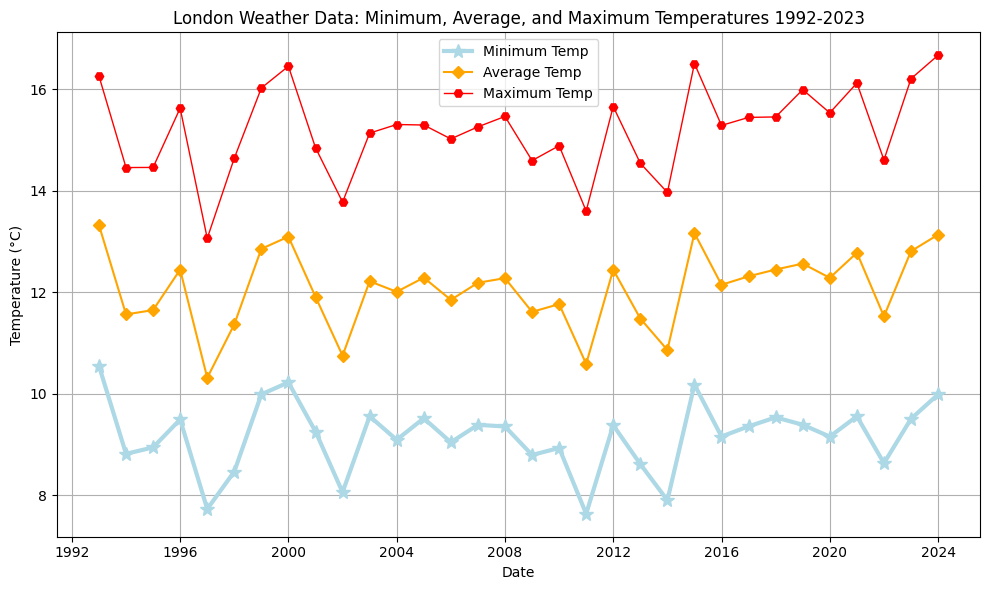

In [ ]:
# resample the data to make it more readable

london_data_resampled = london_data.resample('Y')[['average_temp', 'minimum_temp', 'maximum_temp']].mean()

plt.figure(figsize=(10, 6))

# Plot minimum temperature
plt.plot(london_data_resampled.index, london_data_resampled['minimum_temp'], label='Minimum Temp', linestyle='-', marker='*', color='lightblue', lw = 3, ms = 10)

# Plot average temperature
plt.plot(london_data_resampled.index, london_data_resampled['average_temp'], label='Average Temp', linestyle='-', marker='D', color='orange')

# Plot maximum temperature
plt.plot(london_data_resampled.index, london_data_resampled['maximum_temp'], label='Maximum Temp', linestyle='-', marker='H', color='red', lw = 1)

plt.title('London Weather Data: Minimum, Average, and Maximum Temperatures 1992-2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Subplots

* The plt.subplots() function is used to create multiple subplots within a single figure.
* This function returns a figure object, which is used to contain graphs, and an array of axes objects, which are the individual graphs.

**plt.subplots(nrows, ncols, figsize, sharex, sharey):**
* nrows: The number of rows of subplots in the grid.
* ncols: The number of columns of subplots in the grid.
* figsize (optional): A tuple specifying the width and height of the figure in inches.
* sharex (optional): If True, all subplots in the same column will share the same x-axis.
* sharey (optional): If True, all subplots in the same row will share the same y-axis.


**fig, axes**

* 'fig' is the figure object created by plt.subplots(). It represents the entire figure where subplots are arranged.
axes:
* 'axes' This is an array of axes objects, one for each subplot.
You can access each subplot using indexing, such as axes[0] for the first subplot, axes[1] for the second, and so on.
* You can set properties, titles, labels, and plot data for each subplot using axes[n].

**suptitle(title, fontsize):**
* suptitle is a method to add a super title (a title for the entire figure) above all the subplots.
* title is the text of the super title.
* fontsize (optional) specifies the font size of the super title.

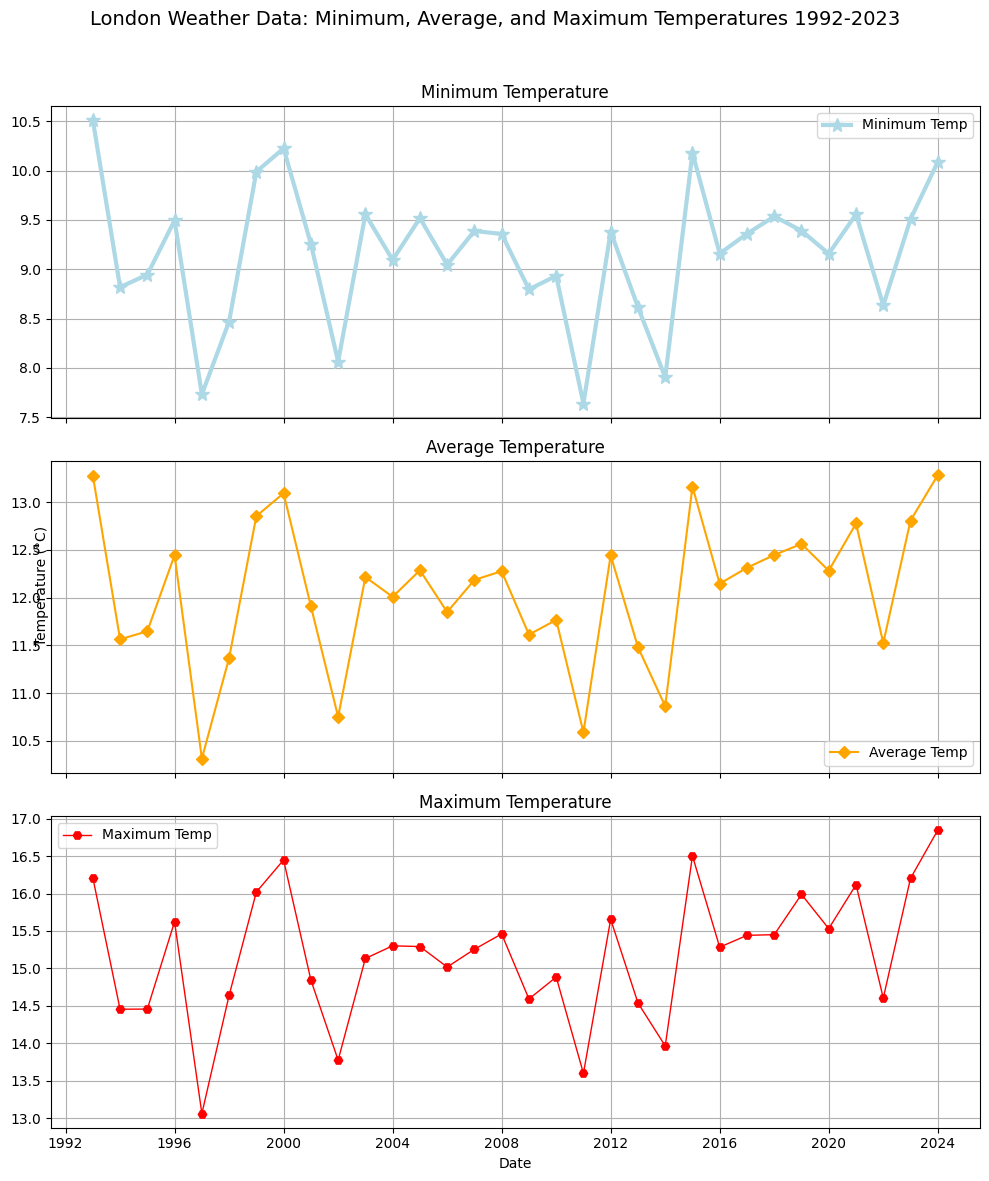

In [ ]:
# Resample the data to make it more readable
london_data_resampled = london_data.resample('Y')[['average_temp', 'minimum_temp', 'maximum_temp']].mean()

# Create a figure with three vertically arranged subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot minimum temperature in the first subplot
axes[0].plot(london_data_resampled.index, london_data_resampled['minimum_temp'], label='Minimum Temp', linestyle='-', marker='*', color='lightblue', lw=3, ms=10)
axes[0].set_title('Minimum Temperature')

# Plot average temperature in the second subplot
axes[1].plot(london_data_resampled.index, london_data_resampled['average_temp'], label='Average Temp', linestyle='-', marker='D', color='orange')
axes[1].set_title('Average Temperature')

# Plot maximum temperature in the third subplot
axes[2].plot(london_data_resampled.index, london_data_resampled['maximum_temp'], label='Maximum Temp', linestyle='-', marker='H', color='red', lw=1)
axes[2].set_title('Maximum Temperature')

# Common x-axis label
fig.suptitle('London Weather Data: Minimum, Average, and Maximum Temperatures 1992-2023', fontsize=14)
plt.xlabel('Date')

# Common y-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical')

# Add legends and grids to each subplot
for ax in axes:
    ax.legend()
    ax.grid(True)

# Adjust subplot spacing
plt.tight_layout()

# Adjust the vertical spacing between subplots
plt.subplots_adjust(top=0.9)

plt.show()
